# 데이터 전처리 실습

- 타이타닉 생존자 예측 문제 데이터의 전처리

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.36.15.png?raw=1" width=400 align='left'>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 다운로드
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [92]:
data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")
print(data.shape)
data[:5]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df = data.copy()


## 데이터 전처리 종류

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

## 데이터 기본 정보
- info를 사용
- 컬럼 이름, 컬럼수(특성 수), 샘플수를 파악한다
- 카테고리형 타입(object)과 숫자형 타입(int, float)을 파악한다
 - 숫자 타입도 연속적인 값을 갖는 아나로그형과 카테고리형이 있다

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
#숫자형 데이터의 기본 통계값 보기
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


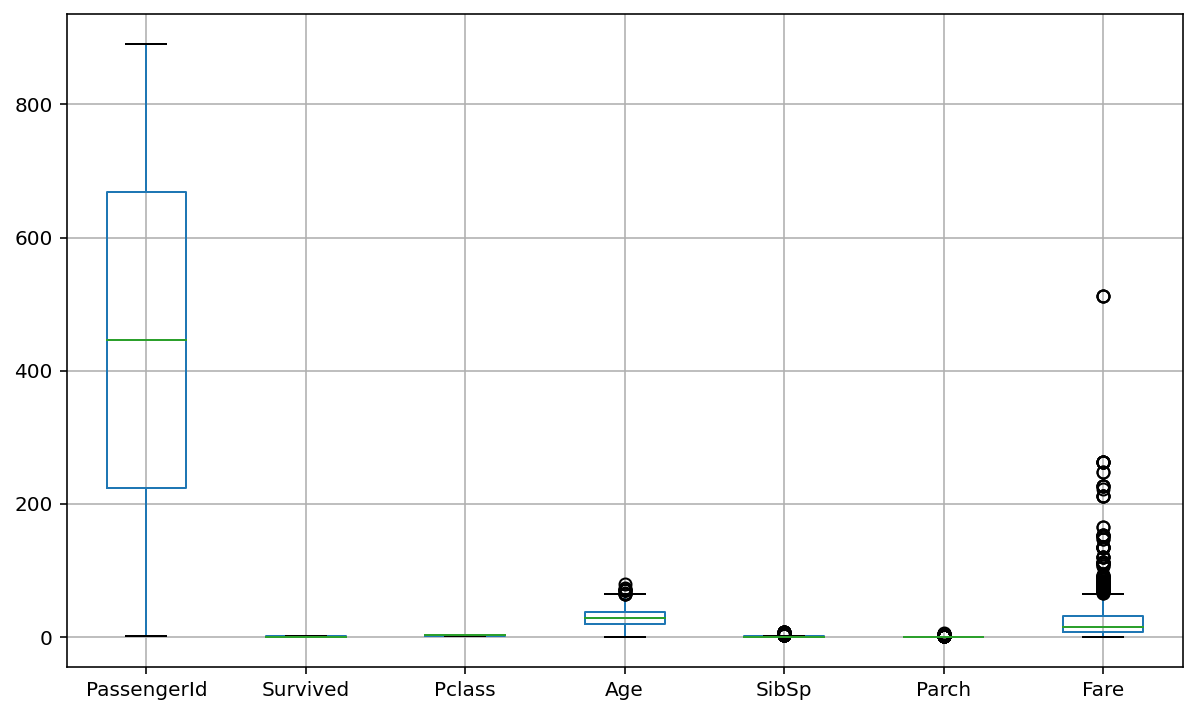

In [96]:
# 박스 플롯으로 데이터의 전체적인 값의 범위를 파악할 수 있다
plt.figure(figsize=(10,6))
df.boxplot()

In [97]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

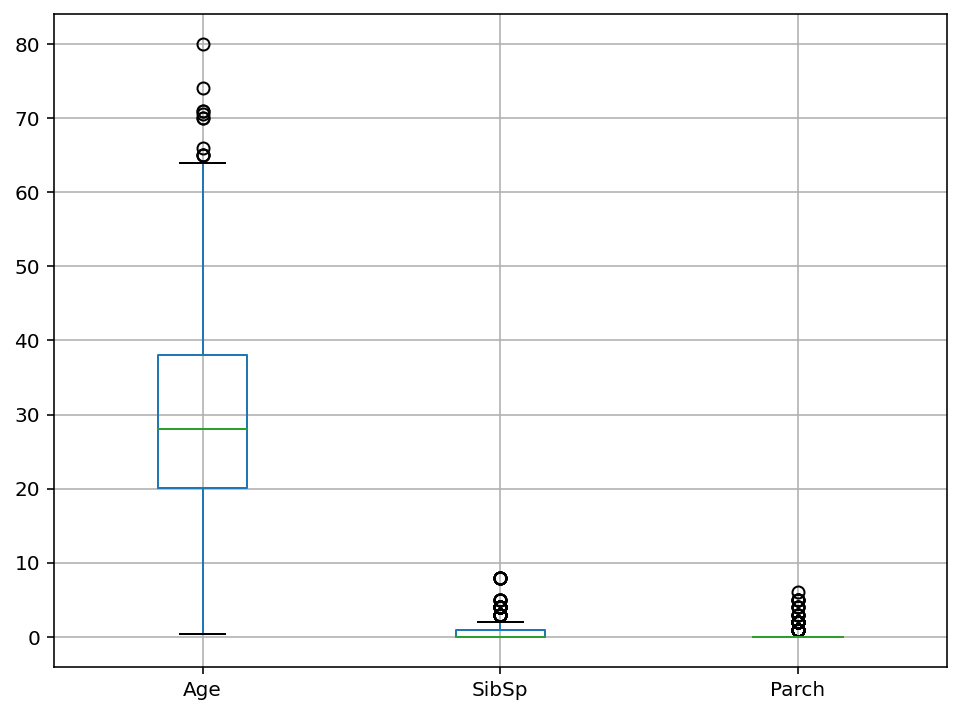

In [98]:
#특정 column만 보기
plt.figure(figsize=(8,6))
df[['Age','SibSp','Parch']].boxplot()


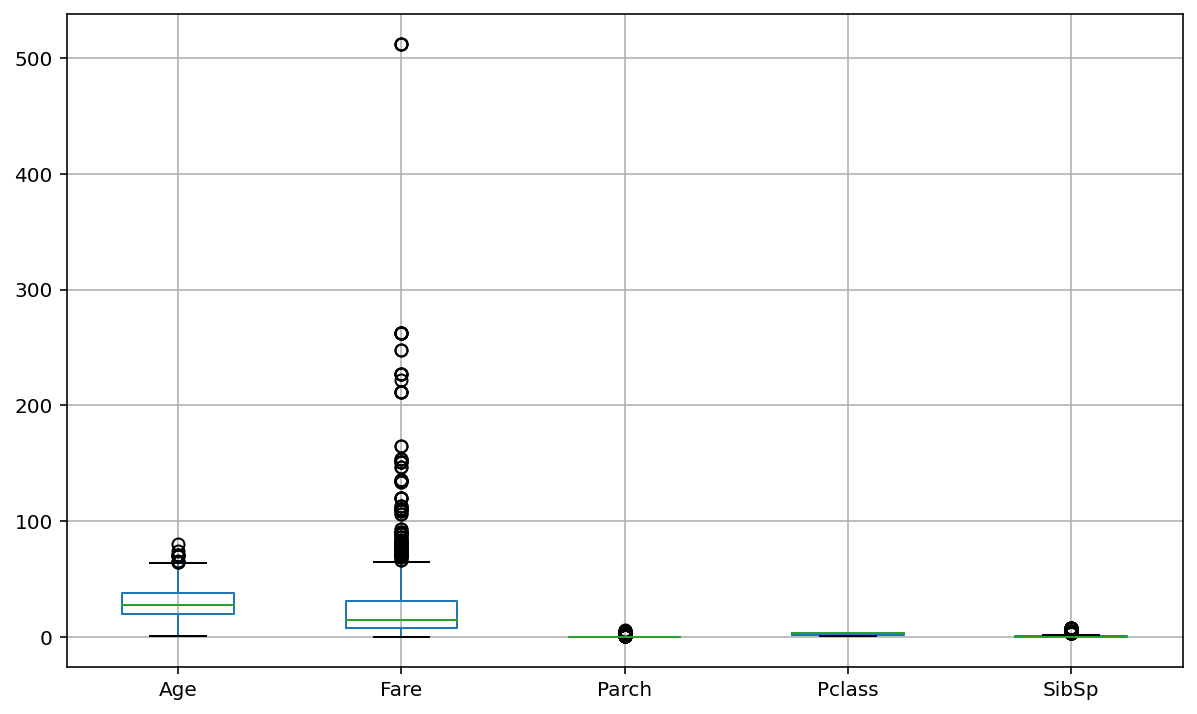

In [99]:
#특정 컬럼만 제외하고 보기
plt.figure(figsize=(10,6))
df[df.columns.difference(['PassengerId', 'Survived'])].boxplot()

# 결측치 처리

- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
- 특정 컬럼에 결측치가 너무 많은 경우 컬럼 자체를 사용하지 않는 방법도 있다


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-06%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.01.24.png?raw=1" width=320 align='left'>

In [100]:
# 컬럼별 결측치 갯수
# 결측치가 있는 컬럼이 3개인 것을 알 수 있다
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 결측치 샘플 삭제
- 항구 데이터(Embarked)는 결측치가 2개 뿐이고 다른 값으로 대체하기가 어려우므로 샘플을 삭제한다

In [101]:
df.shape

(891, 12)

In [102]:
df = df[~df["Embarked"].isnull()] # ~ << true / false가 뒤집어진다 
# 그러면 null이 반대로 뽑이겠다 .. false 가 889개가 있고 true가 2개가 있다
df.shape #2개의 original FALSE가 삭제되었다!

(889, 12)

## 컬럼 미사용
- Cabin은 객실명으로, 의미있는 정보가 아니고, 결측치가 많고(687개), 종류가 다양하므로(146종류) 컬럼 자체를 사용하지 않기로 한다

In [103]:
# 객실명 보기
print("Cabin 결측치수:", df.Cabin.isnull().sum())
print("Cabin 종류:", len(df.Cabin.value_counts()))
df.Cabin.value_counts()[:10]

Cabin 결측치수: 687
Cabin 종류: 146


G6             4
B96 B98        4
C23 C25 C27    4
F2             3
E101           3
D              3
C22 C26        3
F33            3
C93            2
E25            2
Name: Cabin, dtype: int64

## 결측치 대체

- Age(나이)는 결측치가 많으나, 의미 있는 정보이므로 삭제하지 않고 다른 값으로 대체한다 (평균치 사용)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


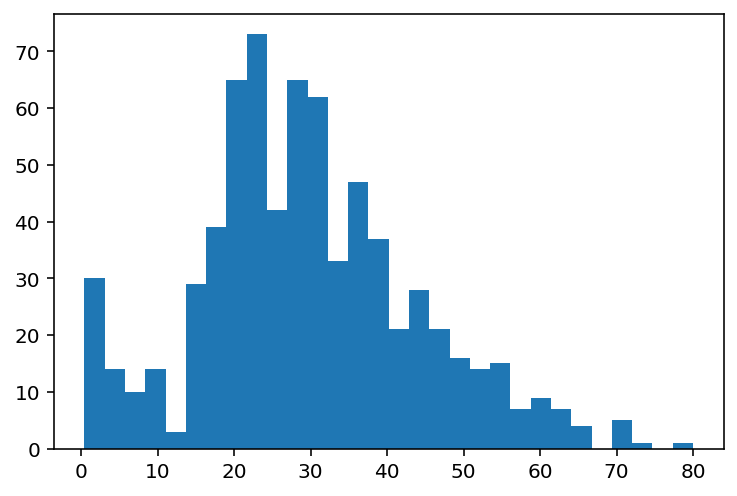

In [104]:
#나이 평균 분포
plt.hist(df.Age, bins=30);
plt.show()

In [105]:
#나이 평균
df.Age.mean()

29.64209269662921

In [106]:
#결측치를 평균 나이로 대체 (대체한 것을 즉시 반영함)
df.Age.fillna(df.Age.mean(), inplace=True) #inplace True => 즉시 반영
# df["Age"].fillna(df.Age.mean(), inplace=True) This works too
df.Age.isnull().sum()

0

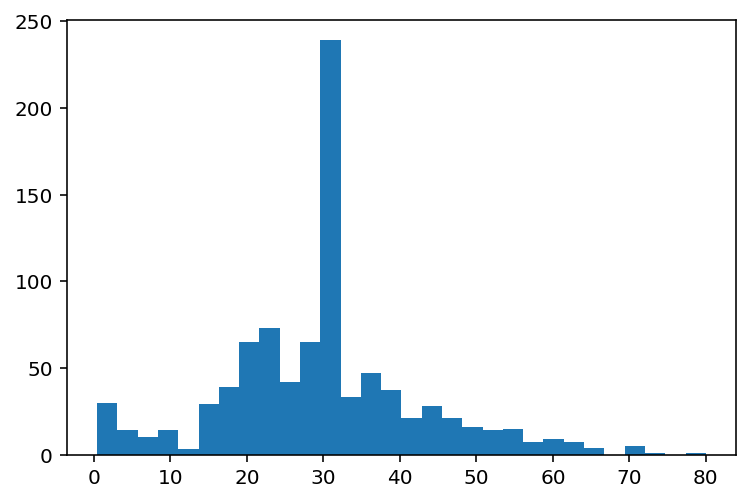

In [107]:
# 결측치를 평균값으로 대체한 후 나이 분포
plt.hist(df.Age, bins=30); plt.show()

# 데이터 변환
- 카테고리 변수와 아나로그 변수로 나누어 처리한다
- 카테고리 변수는 일반적으로 원핫 인코딩으로 표현한다
- 아나로그 변수는 로그변환, 역수변환 등을 하거나 카테고리 변수로 변환하기도 한다

## 카테고리 변수
### 선실 등급
- 숫자로 표현되어 있으나 카테고리를 나타낸다 (3가지 등급)
- 원핫(one-hot) 인코딩으로 변환한다
- get_dummies() 사용

In [108]:
# 선실 등급은 3가지 등급을 나타내는 카테고리 변수임

df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [109]:
# 원핫 인코딩 결과를 별도의 데이터프레임으로 만들어 둔다
df_class =  pd.get_dummies(df["Pclass"], prefix="Class")
df_class.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


- 클래스가 1, 2, 3 정도로 갯수가 적으면 모델(프로그램)이 카테고리 변수로 인식하여 운좋게 잘 동작할 수도 있습니다.

- 그런데 클래스가 10개라고 하면 1~10의 숫자가 양을 나타내는지 카테고리를 나타내는지 컴퓨터가 구분할 수가 없습니다. 기본적으로는 양으로 인식하게 되고 오동작을 하게 됩니다. 클래스2가 클래스1보다 뭔가 두 배 많은 것을 나타내지는 않겠지요. 국적을 구분할 때도 국가 번호가 양을 나타낸다고 볼 수 없습니다.

- 따라서 카테고리 변수는 원한 인코딩을 꼭 해주어야 합니다. 단 카테고리가 2개를 구분할 때는 편의상 0/1을 나타내는 한 컬럼(변수)만 써도 동일하게 동작합니다.

- If we have small number of categories (ex. 2~4), yes it might work as good variables for the model to learn.
- However, if we have 10 classes, the model does not recognize and cannot distinguish if the given variables are categorical or numerical. If the model thinks that it is numerical, 

### 성별
- 성별도 카테고리 변수이며 원핫 인코딩으로 변환한다

In [110]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [111]:
df_sex = pd.get_dummies(df["Sex"], prefix="Sex")
df_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


### 항구명
- 세가지 항구명도 카테고리 변수이며 원핫 인코딩으로 변환한다

In [112]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [113]:
df_embarked = pd.get_dummies(df["Embarked"], "Embarked")
df_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


### 티켓명
- 680 종류나 되며 분석에 큰 의미가 없는 것으로 보인다. 분석에 사용하지 않는다

In [114]:
#티켓의 종류의 수
df['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
3101295     6
           ..
8475        1
364511      1
36967       1
CA. 2314    1
315097      1
Name: Ticket, Length: 680, dtype: int64

In [115]:
# 티켓의 종류의 수
df['Ticket'].nunique()

680

In [116]:
df['Ticket'].unique()[:30]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601'],
      dtype=object)

## 아나로그 변수

### 요금

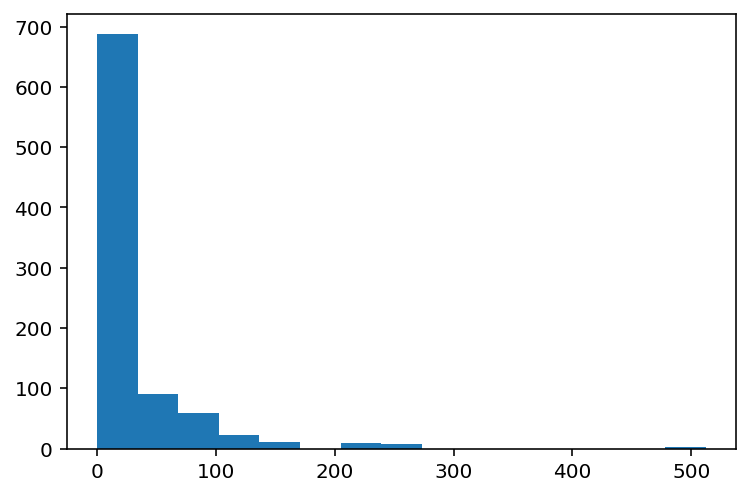

In [117]:
plt.hist(df.Fare, bins=15); plt.show()

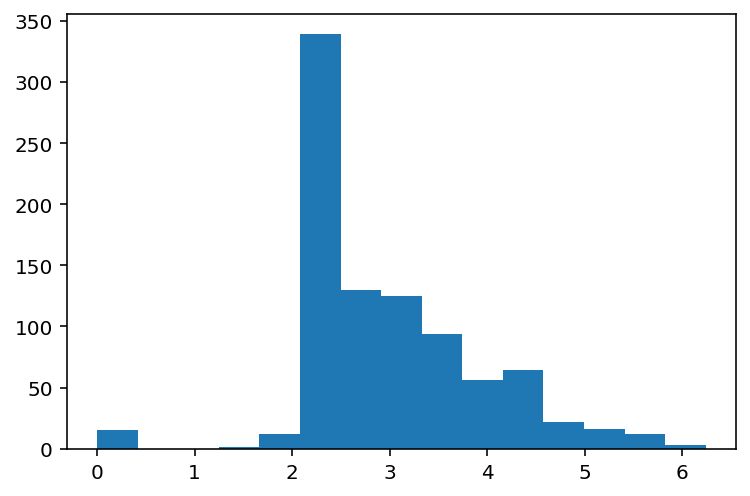

In [118]:
# 돈과 관련된 값은 로그변환을 하여 선형적인 값으로 변환하는 경우가 많다
# 로그를 취하면 정규 분포처럼 보인다 (log-normal 분포)
plt.hist(np.log(df.Fare+1), bins=15); plt.show()

### 기타 변수
- 형제, 동반자, 부모, 자녀 수 등은 다양하게 분포하며 분석에 그대로 사용할 수 있을 것이다
- 즉, 별도의 변환은 하지 않는다

In [119]:
# 형제, 동반자 수 종류
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [120]:
# 부모, 자녀 수 종류
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# 컬럼 취합
- 원핫 인코딩으로 만든 컬럼들을 모두 합친다

In [121]:
# 사용할 아나로그 변수 컬럼들을 먼저 선택한다
X = df[['Age', 'SibSp', 'Parch', 'Fare',]]
X[:3]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250


In [122]:
# 원핫 인코딩한 카테고리 변수 컬럼들을 가로로 붙인다 (axis=1)
X = pd.concat([X, df_class, df_embarked, df_sex], axis=1)
X[:5]

,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


# 스케일링
- 일반적으로 연속형 (continuous), 아나로그 값은 스케일링을 하는 것이 안전하다
- scaling해서 문제될건 없다. 상대적인게 절대적인거보다 낫다.
- scaling을 안하면 생길 수 있는 문제가 있다 왜냐하면 우리는 변수를 하나를 보는게 아니고 많이 본다.
- 그래서 상대적으로 값을 scaling한다. 
- 결정트리, 랜덤 포레스트 등 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만 선형모델, 신경망 모델 등에서 스케일링을 해야 잘 동작한다
- 기본적으로는 표준 스케일링을 하며, 최대값과 최소값의 범위가 분명히 한정되어 있을 때는 min-max 스케일링도 사용한다

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['Age', 'SibSp', 'Parch', 'Fare']])

In [124]:
X[:5]

,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,-0.589620,0.431350,-0.474326,-0.500240,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,0.788947,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.486650,0,0,1,0,0,1,1,0
3,0.413385,0.431350,-0.474326,0.422861,1,0,0,0,0,1,1,0
4,0.413385,-0.475199,-0.474326,-0.484133,0,0,1,0,0,1,0,1


# (참고) 선형 분류 예측
- 개인별 정보를 보고 이 사람의 생존 여부를 예측하는 선형 분류 모델을 만들어 보겠다
- 분류에 대해서는 "머신러닝"에서 자세히 설명한다

### 이진 분류를 위한 결정 경계 (decision boundary)
- 하나의 변수만 사용하는 경우 선형분류 결정 경계: $x_{1} > b$  
b is a constant (Ex. 키가 190 이상인 오른쪽 농구선수들 왼쪽은 축구선수들)
- 두 개의 변수를 사용하는 경우 선형분류 결정 경계: $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$
     
-    - 이진분류라고 한다. (Two variables that we need to consider. For example, height and weight)
     - x1 and x2 are features
     - if more than 2 features, 다중분류 (multi-classifier)
     - it is not a line but a plane


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=550 align='left'>


## 모델 훈련 및 성능 측정


### 목적 변수
- 분류 예측 대상 데이터로서 여기서는 생존 여부 데이터인 Survived 컬럼의 값이다

In [125]:
y = df.Survived
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [138]:
#선형 분류 함수로 SGDClassifer를 사용 Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier, RidgeClassifier
#model = SGDClassifier()
model = RidgeClassifier()


In [139]:
#전체 데이터를 훈련 데이터와 테스트 데이터로 랜덤하게 나눈다 (디폴트 비율은 75%:25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=19)

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

In [140]:
X[:3]

,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,-0.589620,0.431350,-0.474326,-0.500240,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,0.788947,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.486650,0,0,1,0,0,1,1,0


In [141]:
y[:3]

0    0
1    1
2    1
Name: Survived, dtype: int64

In [142]:
len(X_train), len(X_test)

(666, 223)

In [143]:
len(y_train), len(y_test)

(666, 223)

In [144]:
#Train the model using train data using model.fit -> finding the most optimal parameter
#a1, a2 and b
model.fit(X_train, y_train)


RidgeClassifier()

#### Train the model using train data using model.fit -> finding the most optimal parameter which are a1 a2 and b


In [145]:
# Use the test data to find the model's performance --> score function gives accuracy 
model.score(X_test, y_test)

0.7892376681614349

In [146]:
# 선형 모델의 가중치를 본다 (look at the weights)
# 각 특성이 얼마나 중요하게 반영되었는지를 나타낸다
model.coef_

array([[-0.17441306, -0.08657973, -0.03022995,  0.02391631,  0.34637423,
         0.01273162, -0.35910586,  0.02278492,  0.0714143 , -0.09419922,
         0.51517337, -0.51517337]])

In [147]:
model.coef_.shape

(1, 12)

In [148]:
# 가중치의 컬럼 이름을 확인하고 큰 값 순으로 정렬하여 보겠다
result = pd.DataFrame({'feature':X.columns,'weight':model.coef_[0].round(3)})
result.sort_values('weight', ascending=False, inplace=True)
result

,feature,weight
10,Sex_female,0.515
4,Class_1,0.346
8,Embarked_Q,0.071
3,Fare,0.024
7,Embarked_C,0.023
5,Class_2,0.013
2,Parch,-0.030
1,SibSp,-0.087
9,Embarked_S,-0.094
0,Age,-0.174


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

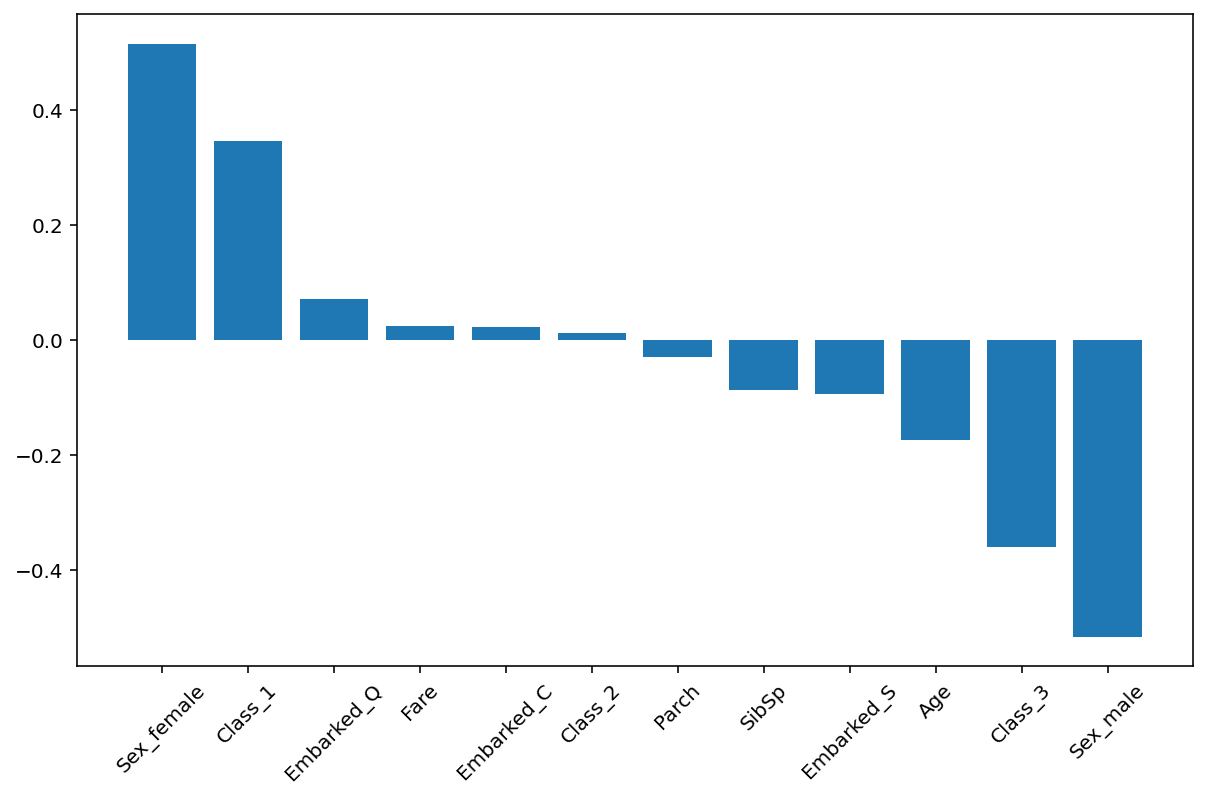

In [149]:
#weight 값을 graph visualize
plt.figure(figsize=(10,6))
plt.bar(result.feature, result.weight)
plt.xticks(rotation=45)

#### Higher the number, the likelihood to survive, the lower the number, the likelihood to be dead.
- Hence, female has a very high change to survive (PREDICITON!), male have a very low probability to survive

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=550 align='left'>

- @@@@@@@@@@@@@@@@@@@@@@@@@
- 멀리 떨어져있는 원은 더 높은점수를 의미한다.
- decision boundary(line)에 가까울수록 점수가 낮다. 애매하다?